# Census Income Project



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings('ignore')
from scipy import stats

# Importing Dataset

In [2]:
df = pd.read_csv("census_income.csv")

In [3]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


# Check Null Values

In [4]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.isnull().values.any()

False

# Shape of the Dataset

In [7]:
df.shape

(32560, 15)

# Lets see the count of Label

In [8]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [9]:
perc= (24719/(24719+7841))*100
perc

75.91830466830467

### Observation- we can see more than 75% of the people's income are less than 50K and only 25% are more than 50K 

<AxesSubplot:xlabel='Income', ylabel='count'>

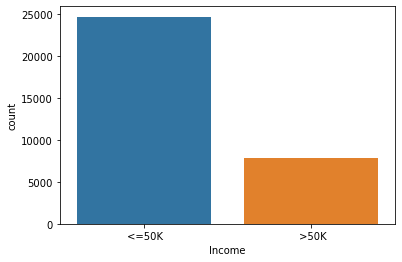

In [10]:
sns.countplot(x='Income', data = df)

# EDA

In [11]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


<AxesSubplot:xlabel='Sex', ylabel='count'>

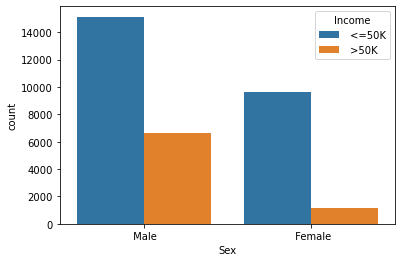

In [13]:
sns.countplot(df['Sex'],hue=df['Income'])

### Observation- Males have comparitively more income than females 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' ?'),
  Text(12, 0, ' Protective-serv'),
  Text(13, 0, ' Armed-Forces'),
  Text(14, 0, ' Priv-house-serv')])

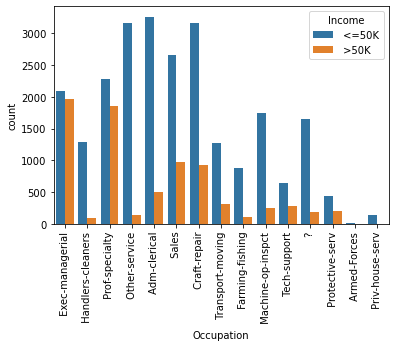

In [14]:
sns.countplot(df['Occupation'],hue=df['Income'])
plt.xticks(rotation=90)

### Observation- Exec-managerial has most income above 50K. Private house service has least income above 50K. Adm-clerical has most likely to get paid below 50K

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, ' 11th'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' 9th'),
  Text(5, 0, ' Some-college'),
  Text(6, 0, ' Assoc-acdm'),
  Text(7, 0, ' Assoc-voc'),
  Text(8, 0, ' 7th-8th'),
  Text(9, 0, ' Doctorate'),
  Text(10, 0, ' Prof-school'),
  Text(11, 0, ' 5th-6th'),
  Text(12, 0, ' 10th'),
  Text(13, 0, ' 1st-4th'),
  Text(14, 0, ' Preschool'),
  Text(15, 0, ' 12th')])

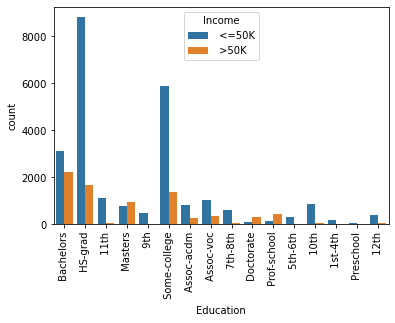

In [15]:
sns.countplot(df['Education'],hue=df['Income'])
plt.xticks(rotation=90)

### Observation- Bachelors has most above 50K income and Preschool has least. HS-graduates most likely to income below 50K

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, ' Married-civ-spouse'),
  Text(1, 0, ' Divorced'),
  Text(2, 0, ' Married-spouse-absent'),
  Text(3, 0, ' Never-married'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Married-AF-spouse'),
  Text(6, 0, ' Widowed')])

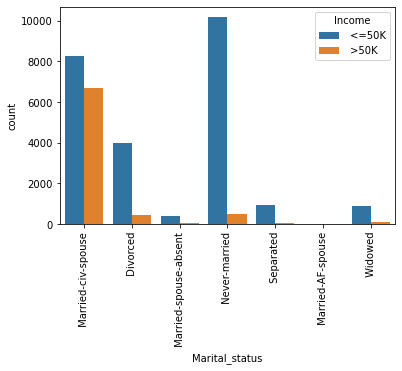

In [17]:
sns.countplot(df['Marital_status'],hue=df['Income'])
plt.xticks(rotation=90)

### Observation- Married-civ-spouse are earning mostly more than 50K and Never-married guys are earning mostly less than 50K

In [18]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, ' Self-emp-not-inc'),
  Text(1, 0, ' Private'),
  Text(2, 0, ' State-gov'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' ?'),
  Text(6, 0, ' Self-emp-inc'),
  Text(7, 0, ' Without-pay'),
  Text(8, 0, ' Never-worked')])

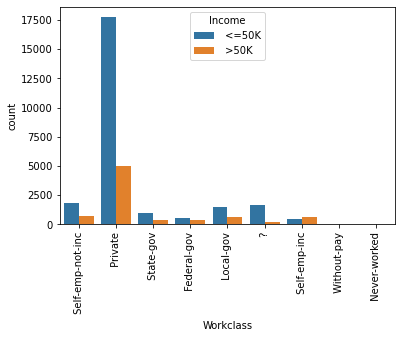

In [19]:
sns.countplot(df['Workclass'],hue=df['Income'])
plt.xticks(rotation=90)

### Observation- Private sector guys are mostly get paid above 50K

In [20]:
df.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [21]:
df = df.replace(' ?', np.NaN)

In [22]:
df.isin([' ?']).sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

### After converting the data to nan I will use Mode to fill the NAN values

In [23]:
for col in ['Workclass', 'Occupation', 'Native_country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [24]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

## Plotting Scatter plot to check features vs label

## Seperating features and label

In [25]:
y= df['Income']
x= df.drop(['Income'], axis =1)

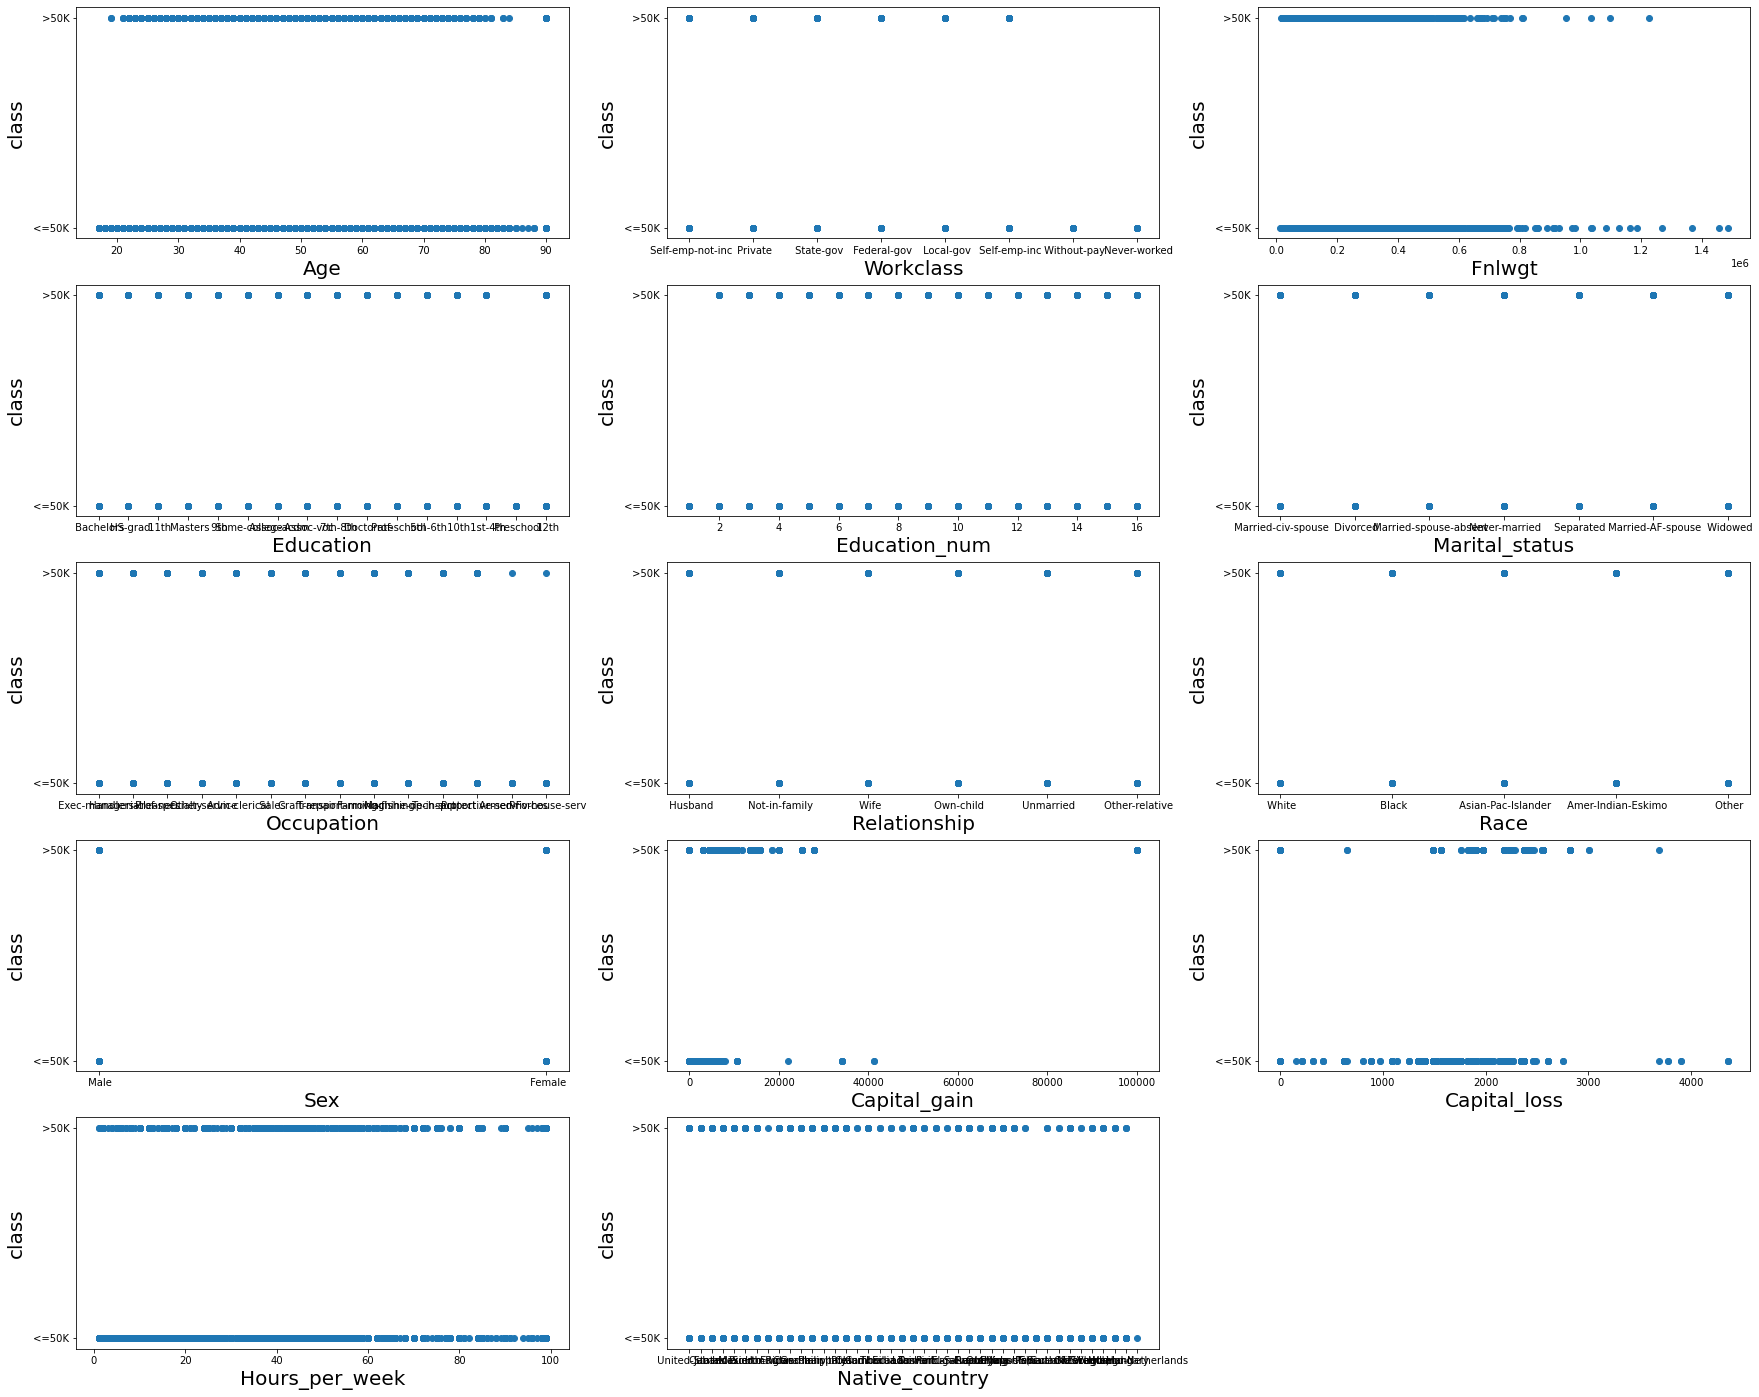

In [26]:
plt.figure(figsize =(30,40),facecolor ='white')
plotnumber = 1
for column in x:
    if plotnumber<=24:
        ax =plt.subplot(8,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('class',fontsize=20)
    plotnumber +=1
plt.show()

# Label Encoder to convert the dataset to numerical

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [28]:
for col in df.columns:
    if df[col].dtypes == 'object':
        df[col] = le.fit_transform(df[col])

In [29]:
df.dtypes

Age               int64
Workclass         int32
Fnlwgt            int64
Education         int32
Education_num     int64
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int32
Income            int32
dtype: object

In [30]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0


# Normal Distribution

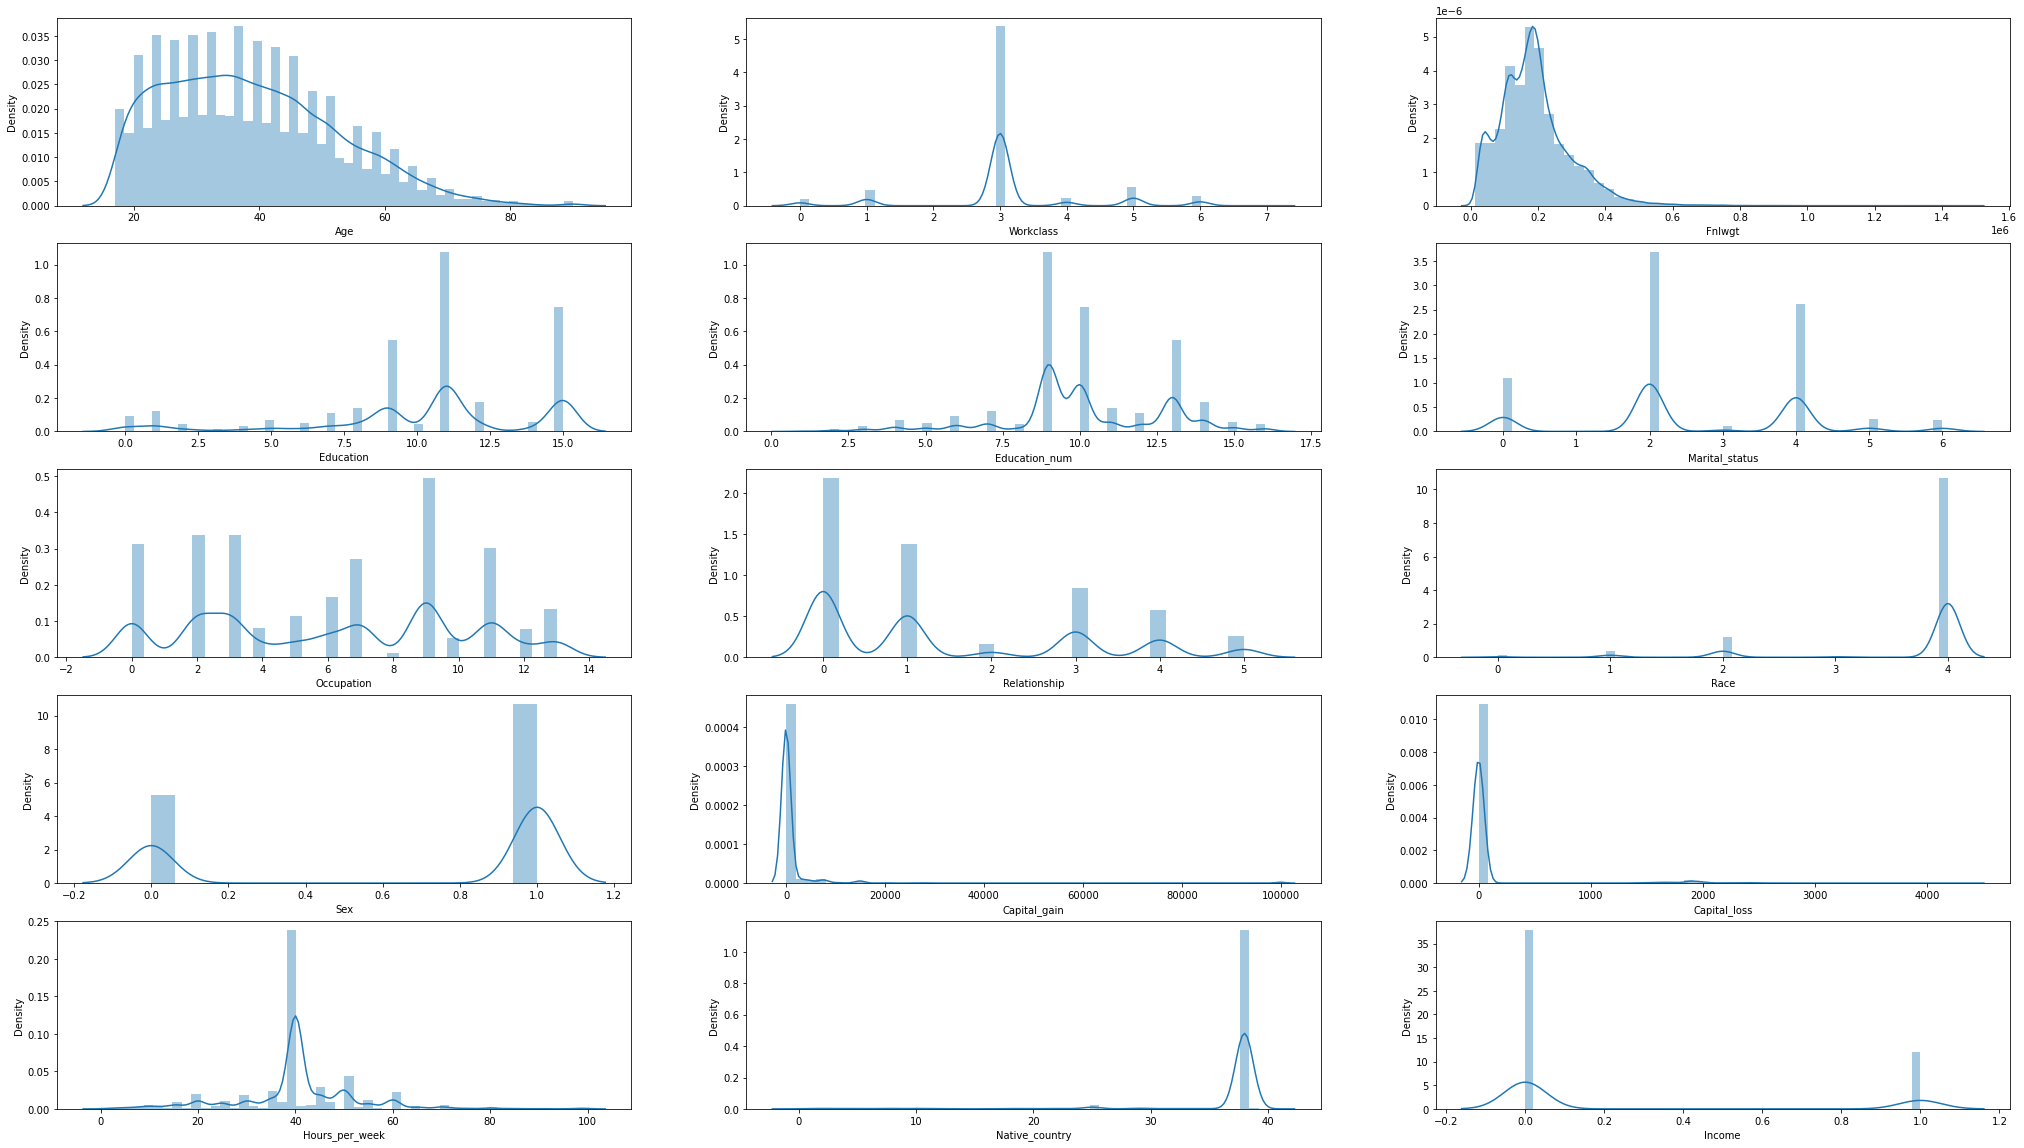

In [31]:
plt.figure(figsize=(35,45))
plotnumber =1

for column in df:
    if plotnumber <= 31:
        ax = plt.subplot(11,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column) 
    plotnumber+=1
plt.show()

Observation- Age, Fnlwgt,Capital_gain,Capital_loss,Hours_per_week are right skewed.
Other columns were categorical 

# Lets Check the correlation 

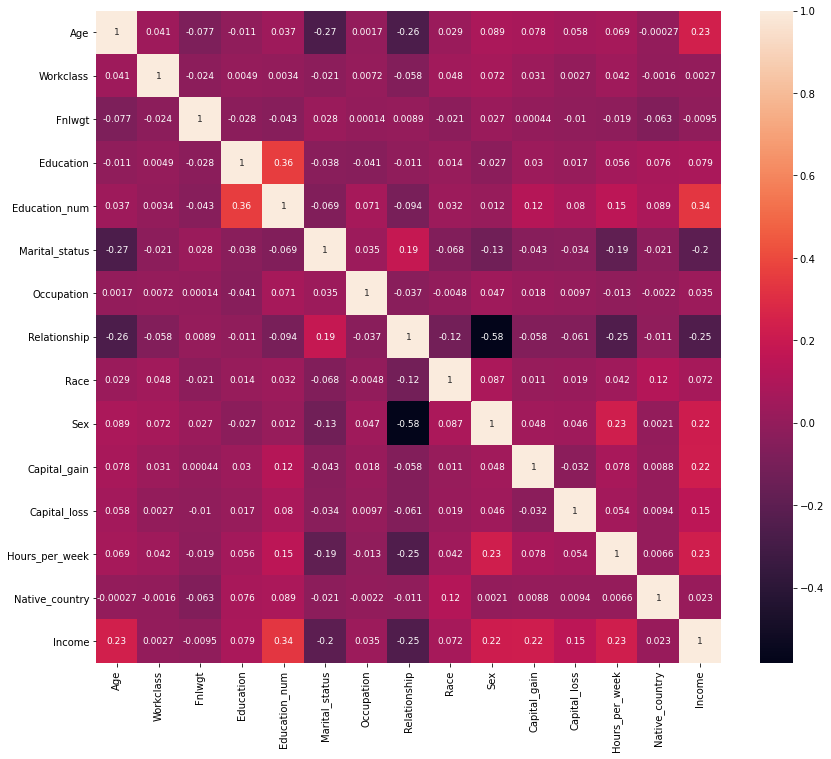

In [32]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),annot=True, annot_kws={"size": 9})
plt.show()

Observation- Education_num and Education is 34% correlated
Education_num and Income is 34% correlated 

other than that everythings looks fine for me

# Checking the Skewness

In [33]:
df.skew()

Age                0.558738
Workclass          0.076178
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.000536
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -4.243083
Income             1.212383
dtype: float64

### Using numpy.log1p() to remove the skewness nearest to 0.55

This mathematical function helps user to calculate natural logarithmic value of x+1 where x belongs to all the input array elements.

log1p is reverse of exp(x) – 1

In [34]:
features = df.drop('Income', axis=1)
label = df['Income']

In [35]:
for col in features:
    if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

In [36]:
df.skew()

Age              -0.113322
Workclass         0.076178
Fnlwgt           -0.842559
Education        -0.934063
Education_num    -0.311630
Marital_status   -0.013448
Occupation        0.000536
Relationship      0.284979
Race             -2.435332
Sex              -0.719244
Capital_gain      3.096803
Capital_loss      4.307460
Hours_per_week    0.227636
Native_country   -4.243083
Income            1.212383
dtype: float64

# Using Boxplot to check the outliers

Age                  AxesSubplot(0.125,0.749828;0.0945122x0.130172)
Workclass         AxesSubplot(0.238415,0.749828;0.0945122x0.130172)
Fnlwgt            AxesSubplot(0.351829,0.749828;0.0945122x0.130172)
Education         AxesSubplot(0.465244,0.749828;0.0945122x0.130172)
Education_num     AxesSubplot(0.578659,0.749828;0.0945122x0.130172)
Marital_status    AxesSubplot(0.692073,0.749828;0.0945122x0.130172)
Occupation        AxesSubplot(0.805488,0.749828;0.0945122x0.130172)
Relationship         AxesSubplot(0.125,0.593621;0.0945122x0.130172)
Race              AxesSubplot(0.238415,0.593621;0.0945122x0.130172)
Sex               AxesSubplot(0.351829,0.593621;0.0945122x0.130172)
Capital_gain      AxesSubplot(0.465244,0.593621;0.0945122x0.130172)
Capital_loss      AxesSubplot(0.578659,0.593621;0.0945122x0.130172)
Hours_per_week    AxesSubplot(0.692073,0.593621;0.0945122x0.130172)
Native_country    AxesSubplot(0.805488,0.593621;0.0945122x0.130172)
Income               AxesSubplot(0.125,0.437414;

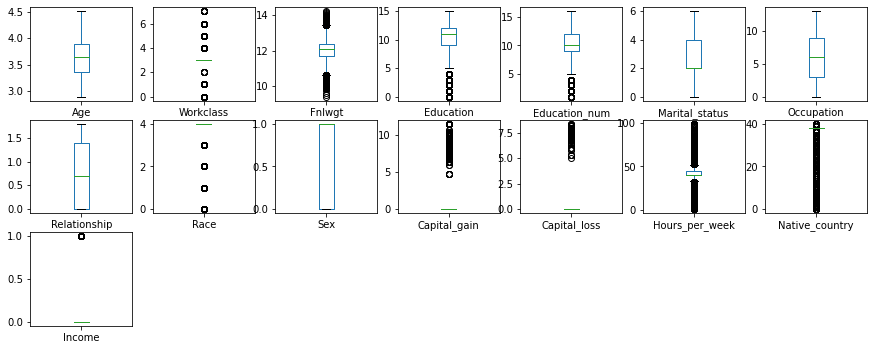

In [37]:
df.plot(kind='box',subplots=True, layout=(5,7),figsize=(15,10))

# Removing Outliers:

In [38]:
df.shape

(32560, 15)

In [39]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(32560, 15)

In [40]:
threshold =3
print(np.where(z>3))

(array([    3,     7,     8, ..., 32550, 32552, 32559], dtype=int64), array([13, 10, 10, ...,  8,  8, 10], dtype=int64))


In [41]:
df_new_z=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new_z.shape)

(32560, 15)
(26277, 15)


In [45]:
loss_percentage=(32401-26277)/32401*100
print(loss_percentage)

18.900651214468688


Observation- After zscore outlier removal we have loss 18% of data which might cost a good amount of loss to us.

Age                  AxesSubplot(0.125,0.749828;0.0945122x0.130172)
Workclass         AxesSubplot(0.238415,0.749828;0.0945122x0.130172)
Fnlwgt            AxesSubplot(0.351829,0.749828;0.0945122x0.130172)
Education         AxesSubplot(0.465244,0.749828;0.0945122x0.130172)
Education_num     AxesSubplot(0.578659,0.749828;0.0945122x0.130172)
Marital_status    AxesSubplot(0.692073,0.749828;0.0945122x0.130172)
Occupation        AxesSubplot(0.805488,0.749828;0.0945122x0.130172)
Relationship         AxesSubplot(0.125,0.593621;0.0945122x0.130172)
Race              AxesSubplot(0.238415,0.593621;0.0945122x0.130172)
Sex               AxesSubplot(0.351829,0.593621;0.0945122x0.130172)
Capital_gain      AxesSubplot(0.465244,0.593621;0.0945122x0.130172)
Capital_loss      AxesSubplot(0.578659,0.593621;0.0945122x0.130172)
Hours_per_week    AxesSubplot(0.692073,0.593621;0.0945122x0.130172)
Native_country    AxesSubplot(0.805488,0.593621;0.0945122x0.130172)
Income               AxesSubplot(0.125,0.437414;

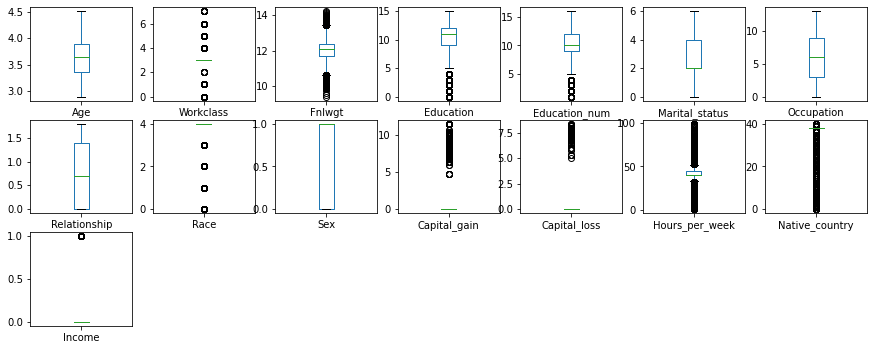

In [46]:
df.plot(kind='box',subplots=True, layout=(5,7),figsize=(15,10))

In [47]:
df.skew()

Age              -0.113322
Workclass         0.076178
Fnlwgt           -0.842559
Education        -0.934063
Education_num    -0.311630
Marital_status   -0.013448
Occupation        0.000536
Relationship      0.284979
Race             -2.435332
Sex              -0.719244
Capital_gain      3.096803
Capital_loss      4.307460
Hours_per_week    0.227636
Native_country   -4.243083
Income            1.212383
dtype: float64

# Scalling the data and creating ML

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [51]:
X1 = df_new_z.drop('Income', axis=1)
y1 = df_new_z['Income']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y1, test_size=0.2, random_state=0)

## Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression()
Lr.fit(x_train,y_train)
predlr = Lr.predict(x_test)
print("Accuracy ", accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy  84.51293759512937
[[4133  169]
 [ 645  309]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      4302
           1       0.65      0.32      0.43       954

    accuracy                           0.85      5256
   macro avg       0.76      0.64      0.67      5256
weighted avg       0.83      0.85      0.82      5256



## Decision Tree Classifier

In [53]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print("Accuracy ", accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy  81.27853881278538
[[3802  500]
 [ 484  470]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      4302
           1       0.48      0.49      0.49       954

    accuracy                           0.81      5256
   macro avg       0.69      0.69      0.69      5256
weighted avg       0.81      0.81      0.81      5256



## Random Forest Classifier

In [54]:
    from sklearn.ensemble import RandomForestClassifier

    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    predrf = rf.predict(x_test)
    print("Accuracy ", accuracy_score(y_test,predrf)*100)
    print(confusion_matrix(y_test,predrf))
    print(classification_report(y_test,predrf))

Accuracy  85.67351598173516
[[4022  280]
 [ 473  481]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4302
           1       0.63      0.50      0.56       954

    accuracy                           0.86      5256
   macro avg       0.76      0.72      0.74      5256
weighted avg       0.85      0.86      0.85      5256



## SVC

In [55]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)
predsv = svc.predict(x_test)
print("Accuracy ", accuracy_score(y_test,predsv)*100)
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

Accuracy  85.36910197869102
[[4125  177]
 [ 592  362]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      4302
           1       0.67      0.38      0.48       954

    accuracy                           0.85      5256
   macro avg       0.77      0.67      0.70      5256
weighted avg       0.84      0.85      0.84      5256



# Cross Validation

### Logistic Regression

In [56]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(Lr,X_scaled,y1,cv=5)
print("Cross validation score of Logistic  model :", scr.mean())

Cross validation score of Logistic  model : 0.8377289296125889


### Random Forest

In [57]:
scr = cross_val_score(rf,X_scaled,y1,cv=5)
print("Cross validation score of Random Forest  model :", scr.mean())

Cross validation score of Random Forest  model : 0.8467863613258084


### SVC 

In [58]:
scr = cross_val_score(svc,X_scaled,y1,cv=5)
print("Cross validation score of SVC model :", scr.mean())

Cross validation score of SVC model : 0.8459870718182436


#### Observation-
Random Forest gave us the most accuracy with highest Cross validation score as well. I will try to hyper tune the Random forest classifier

# Hyper Parameter Tuning

### Random Forest

In [59]:
from sklearn.model_selection import GridSearchCV

parameters= {'max_features' : ['auto','sqrt','log2'],
             'max_depth' : [10,11,13,15,17],
             'criterion': ['gini','entropy']}

In [60]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train) 
GCV.best_params_


{'criterion': 'entropy', 'max_depth': 15, 'max_features': 'auto'}

In [61]:
GCV_pred= GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.8668188736681888

### SVC

In [63]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [65]:
grid = GridSearchCV(SVC(),param_grid,cv=5,scoring="accuracy")
grid.fit(x_train,y_train)
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [66]:
grid_pred= grid.best_estimator_.predict(x_test)
accuracy_score(y_test,grid_pred)

0.8546423135464232

# Conslusion

In [62]:
import numpy as np
a=np.array(y_test)
predicted=np.array(GCV.best_estimator_.predict(x_test))
data_com = pd.DataFrame({"Original": a,"Predicted":predicted},index = range(len(a)))
data_com.head(15)

,Original,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,1,1
6,0,0
7,0,0
8,0,0
9,0,0
